# Math Tools
## 1) Approximation
    - Regression and interpolation are the most used numerical techniques in finance
    
## 2) Convex Optimization
    - focuses on minimizing convex functions over convex sets
    - e.g. used in option pricing for model calibration
    
## 3) Integration
    - essential for valuing derivative assets
    
## 4) Symbolic Math
    - e.g. used in solving systems of equations

# 1) Approximation

In [7]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
plt.rcParams["figure.figsize"] = [30,15]
plt.style.use('fivethirtyeight')

In [4]:
#define a function
f = lambda x: (np.sin(x) + 0.5*x)

- We want to approximate this function over a given interval using regression and interpolation
    - let the interval be $[-2\pi, 2\pi]$
- First, we generate a plot of the function

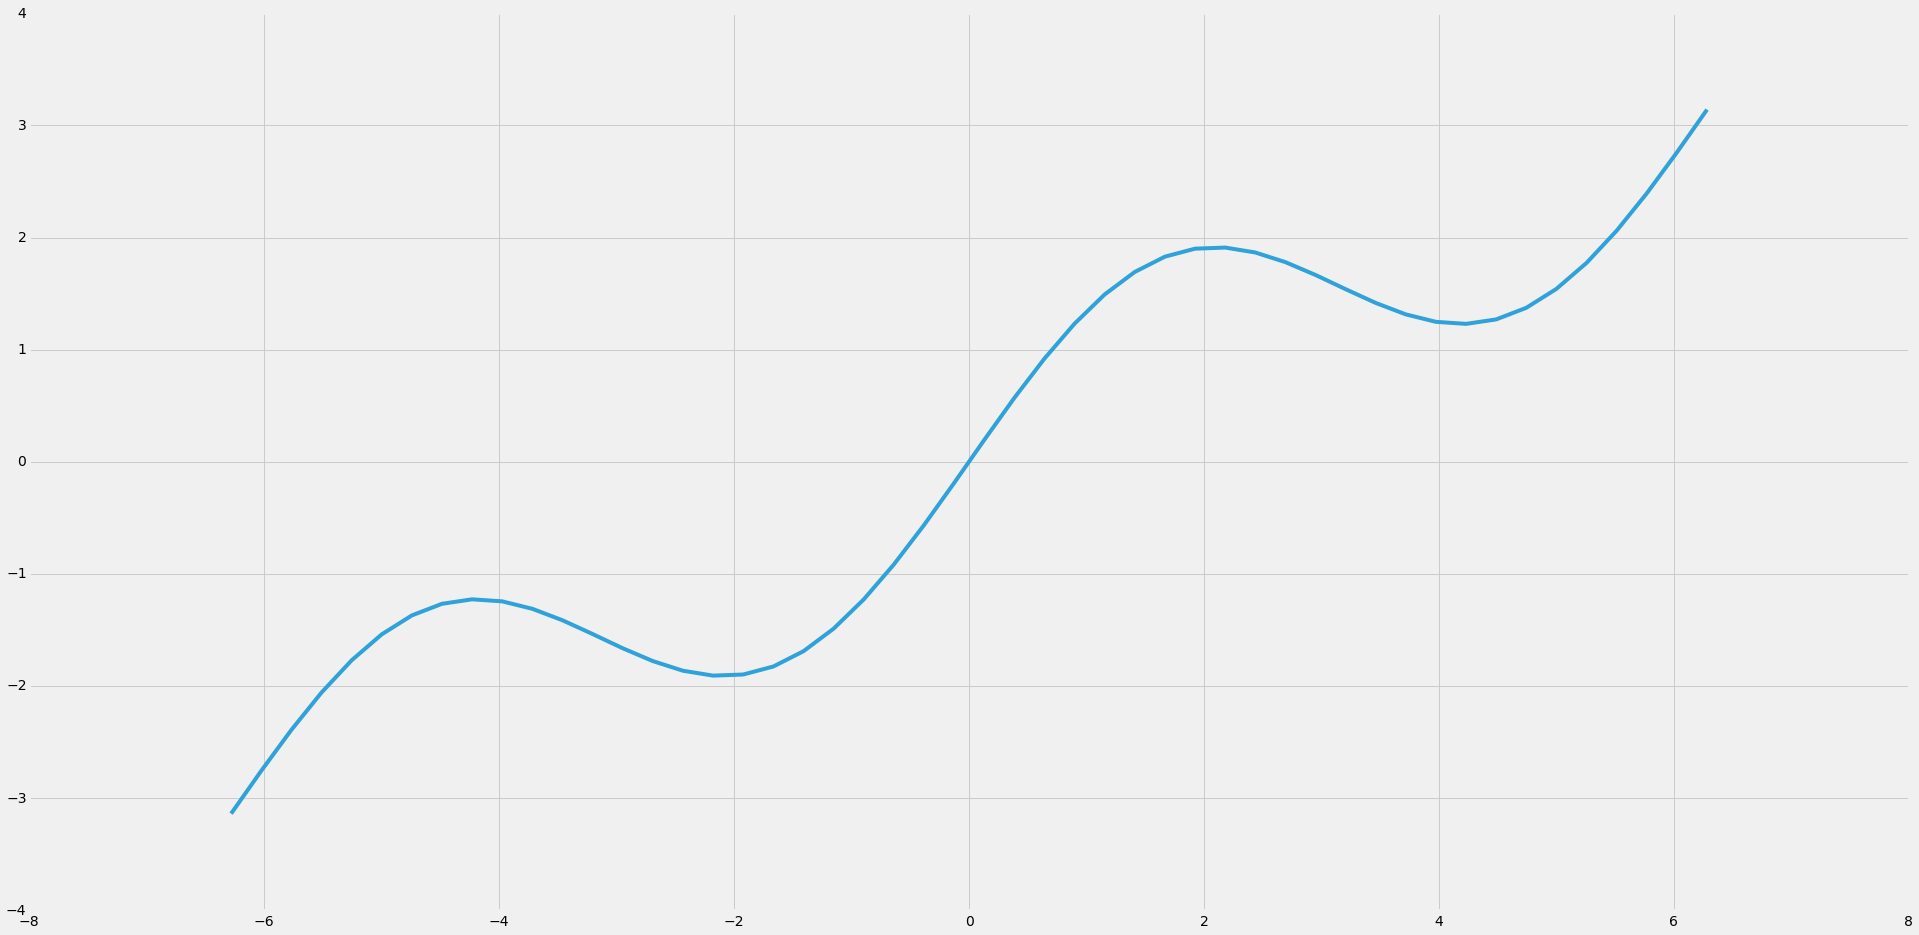

In [8]:
x = np.linspace(-2*np.pi,2*np.pi,50)

plt.plot(x, f(x))

## Recall

- The task of regression is: given a set of basis functions $ \left \{ b_{1}, b_{2}, ..., b_{D} \right \} $, solve for the optimal parameters $\alpha^{*}_{1}, \alpha^{*}_{2}, ..., \alpha^{*}_{D}$ according to the following equation
# $min_{\alpha^{*}_{1}, \alpha^{*}_{2}, ..., \alpha^{*}_{D}}\frac{1}{I}\sum_{I}^{i=1}\left (y_{i}-\sum^{D}_{d=1}\alpha_{d}\cdot b_{d}\cdot x_{i}  \right )^{2}$
## where $y_{i}=f(x_{i})$ for $i \epsilon \left\{ 1,2,...,I \right\}$

## Monomials as basis functions

### Let $b_{1} = 1, b_{2} = x, b_{3} = x^{2},...$

- Numpy has built in functions for handling these monomials

In [11]:
# using numpy to solve for the parameters of a regression line to the function
regression_parameters = np.polyfit(x, f(x), deg=1)
regression_parameters

array([  4.28841952e-01,  -1.33457859e-16])

In [13]:
#creating a line function using the parameters
line = np.polyval(regression_parameters, x)
line

array([-2.69449345, -2.58451412, -2.4745348 , -2.36455548, -2.25457615,
       -2.14459683, -2.0346175 , -1.92463818, -1.81465885, -1.70467953,
       -1.5947002 , -1.48472088, -1.37474156, -1.26476223, -1.15478291,
       -1.04480358, -0.93482426, -0.82484493, -0.71486561, -0.60488628,
       -0.49490696, -0.38492764, -0.27494831, -0.16496899, -0.05498966,
        0.05498966,  0.16496899,  0.27494831,  0.38492764,  0.49490696,
        0.60488628,  0.71486561,  0.82484493,  0.93482426,  1.04480358,
        1.15478291,  1.26476223,  1.37474156,  1.48472088,  1.5947002 ,
        1.70467953,  1.81465885,  1.92463818,  2.0346175 ,  2.14459683,
        2.25457615,  2.36455548,  2.4745348 ,  2.58451412,  2.69449345])

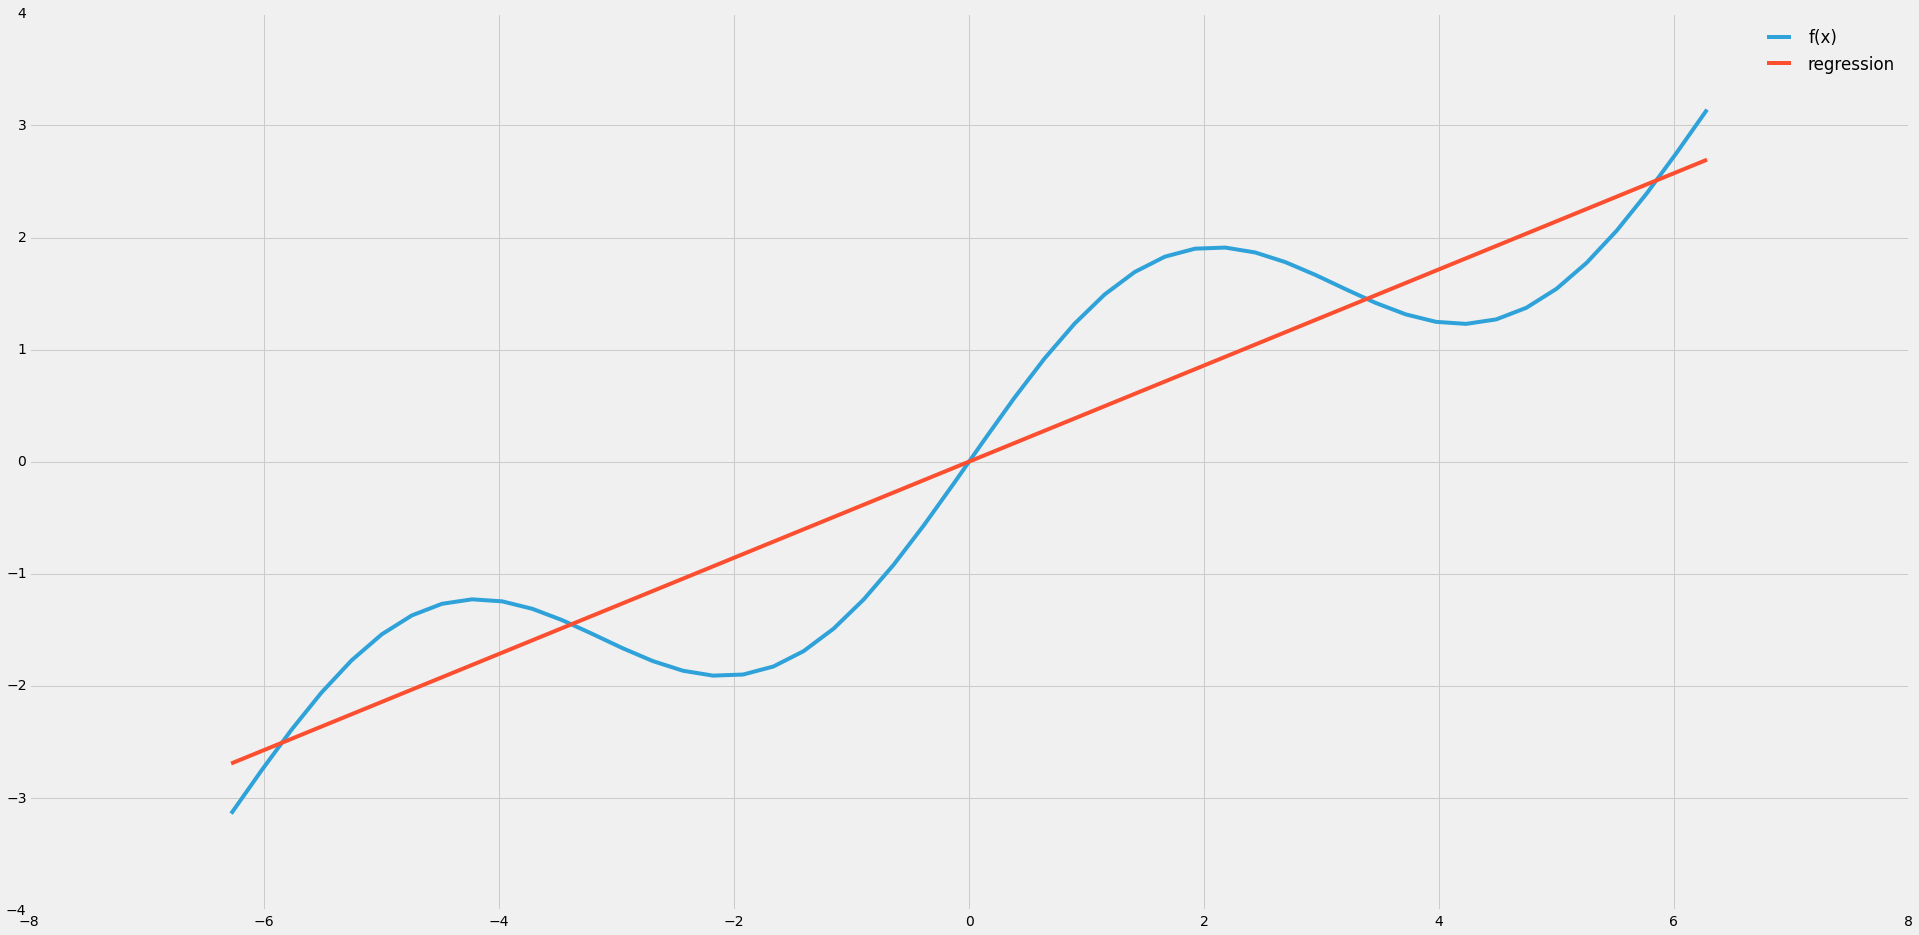

In [14]:
plt.plot(x, f(x), label = 'f(x)')
plt.plot(x, line, label = 'regression')
plt.legend()
plt.show()

- Iterating through higher order polyfit functions

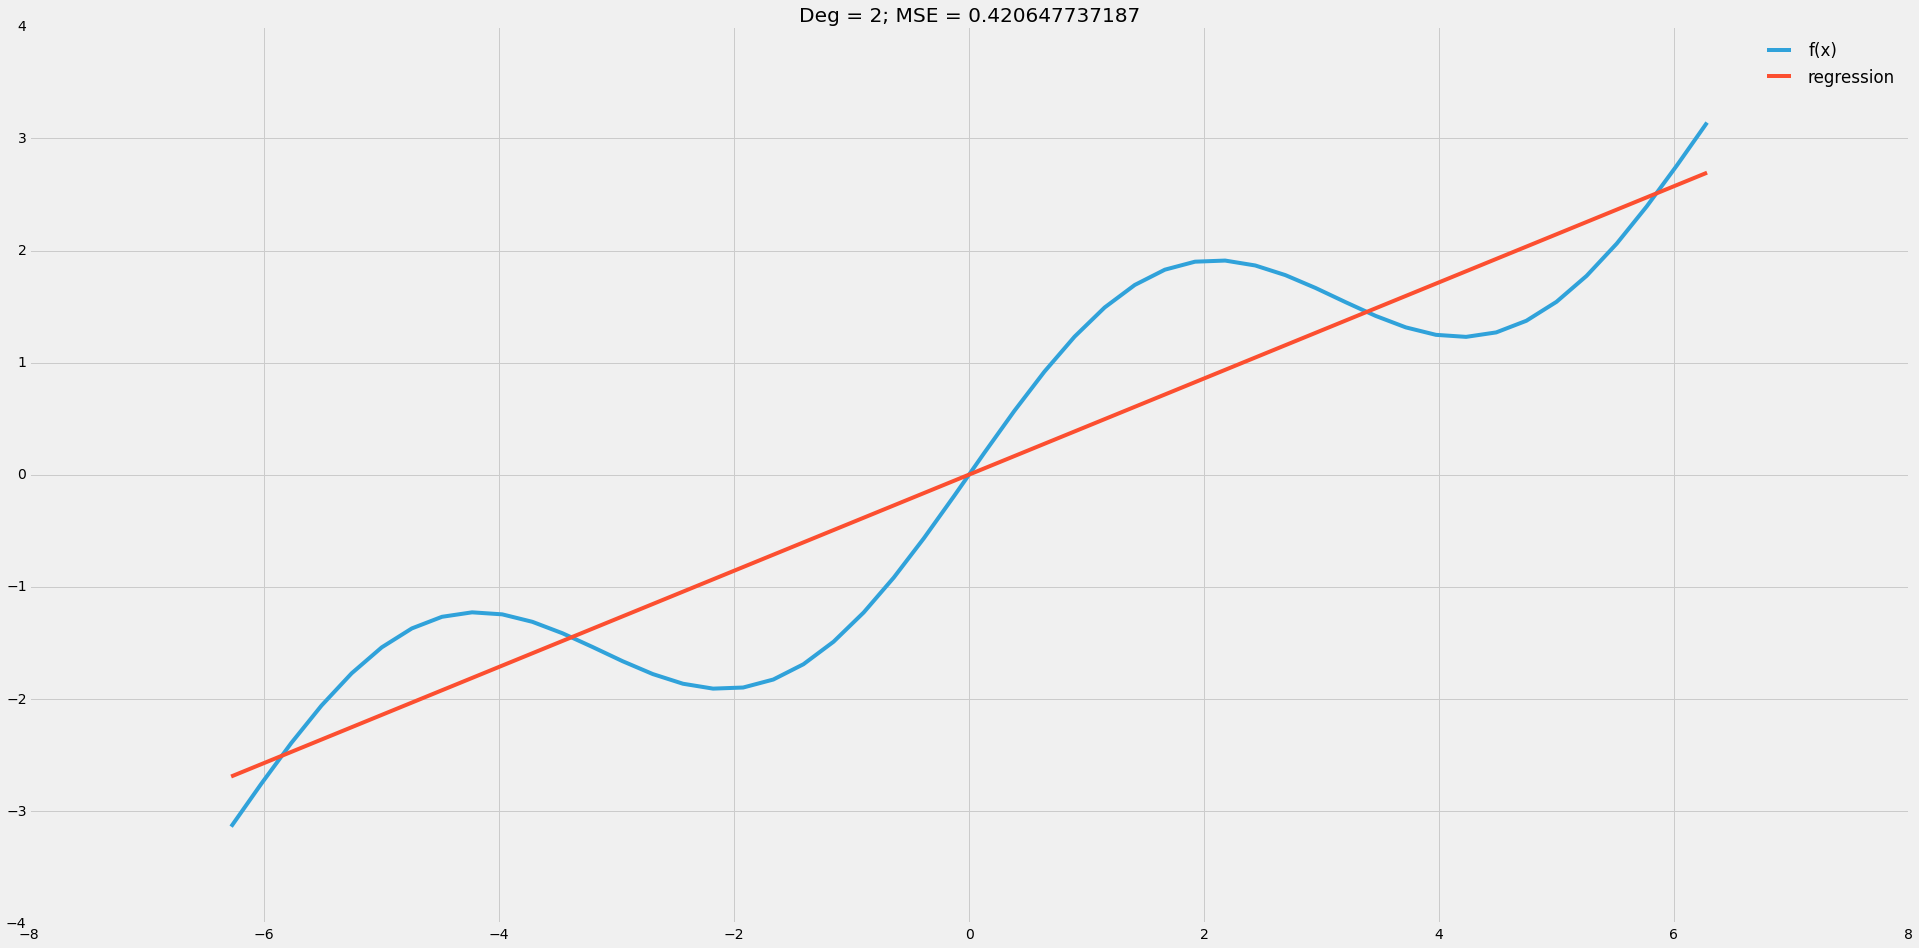

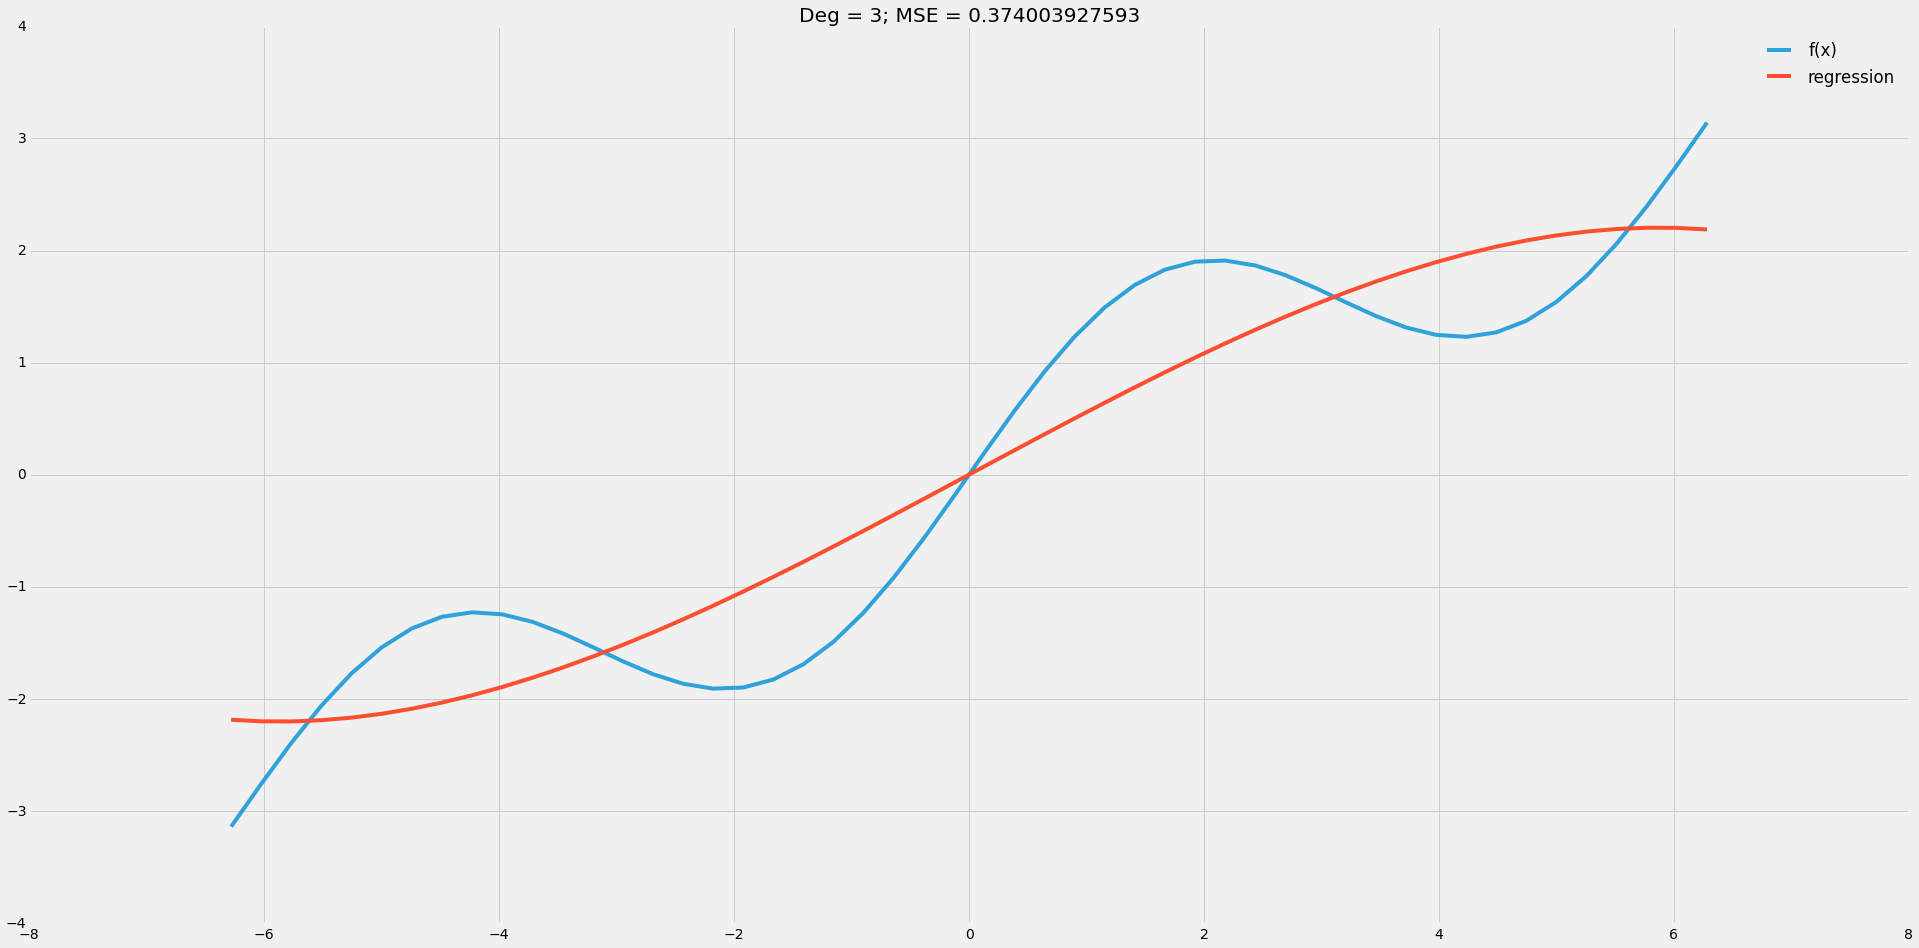

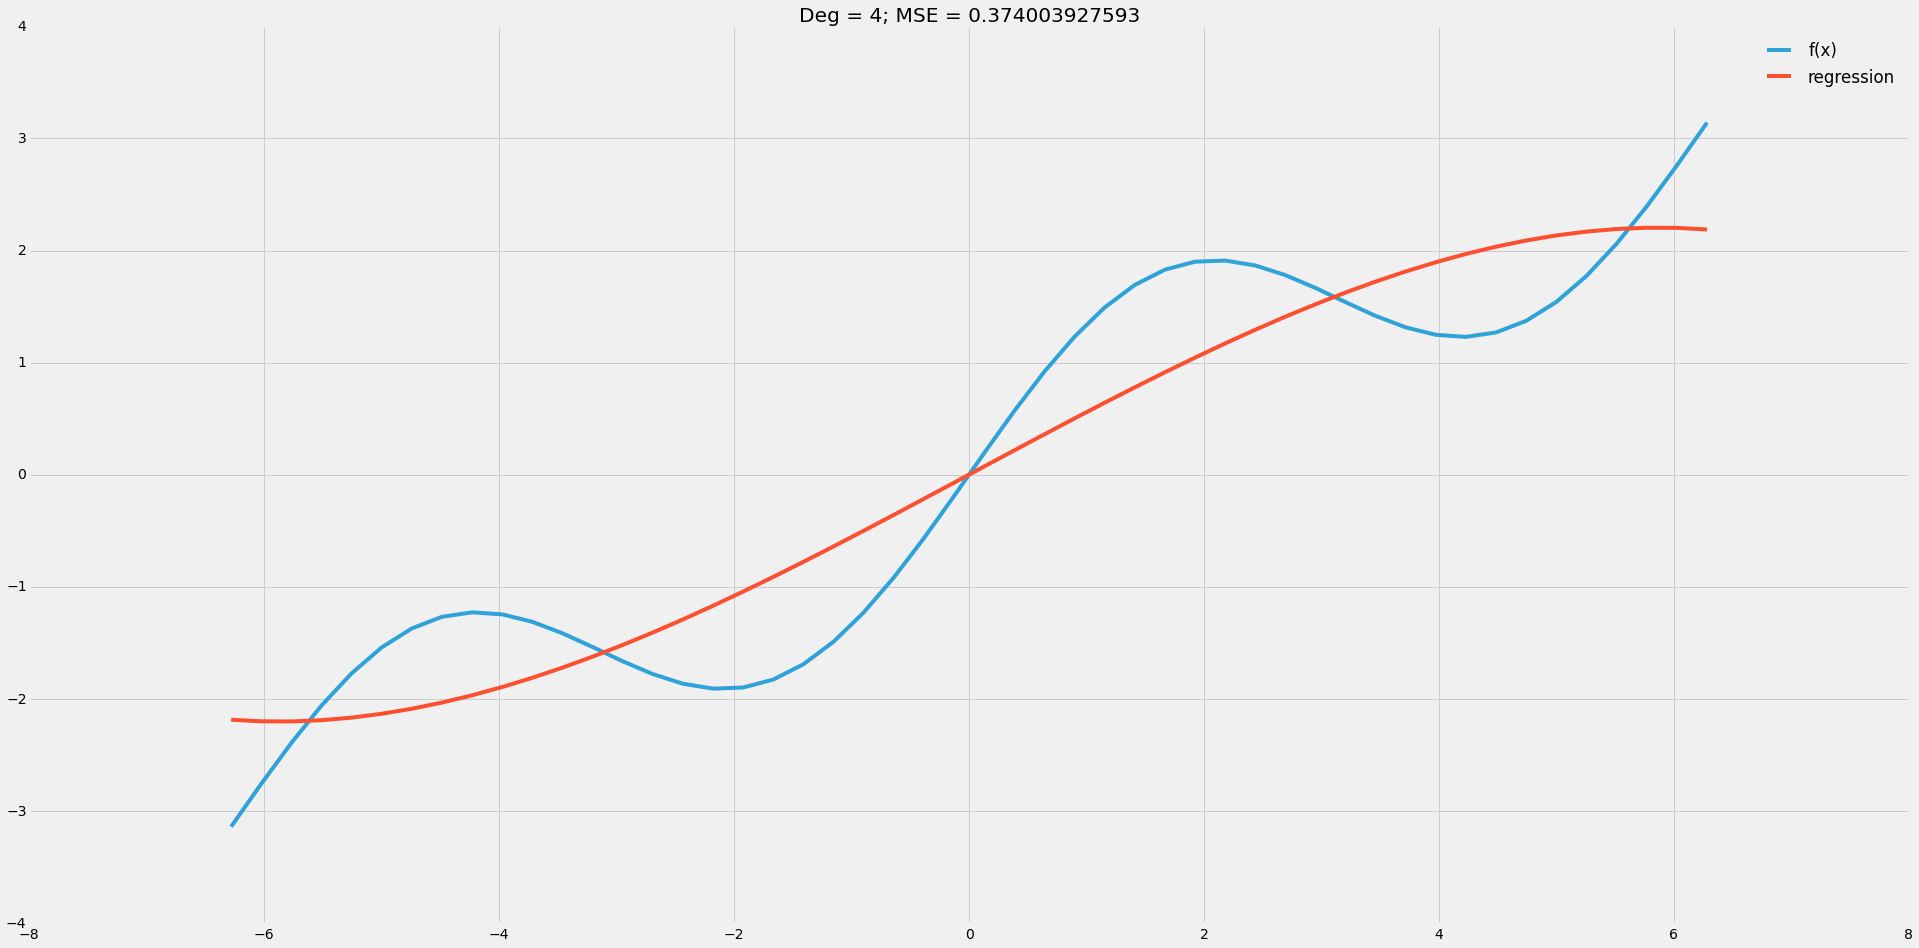

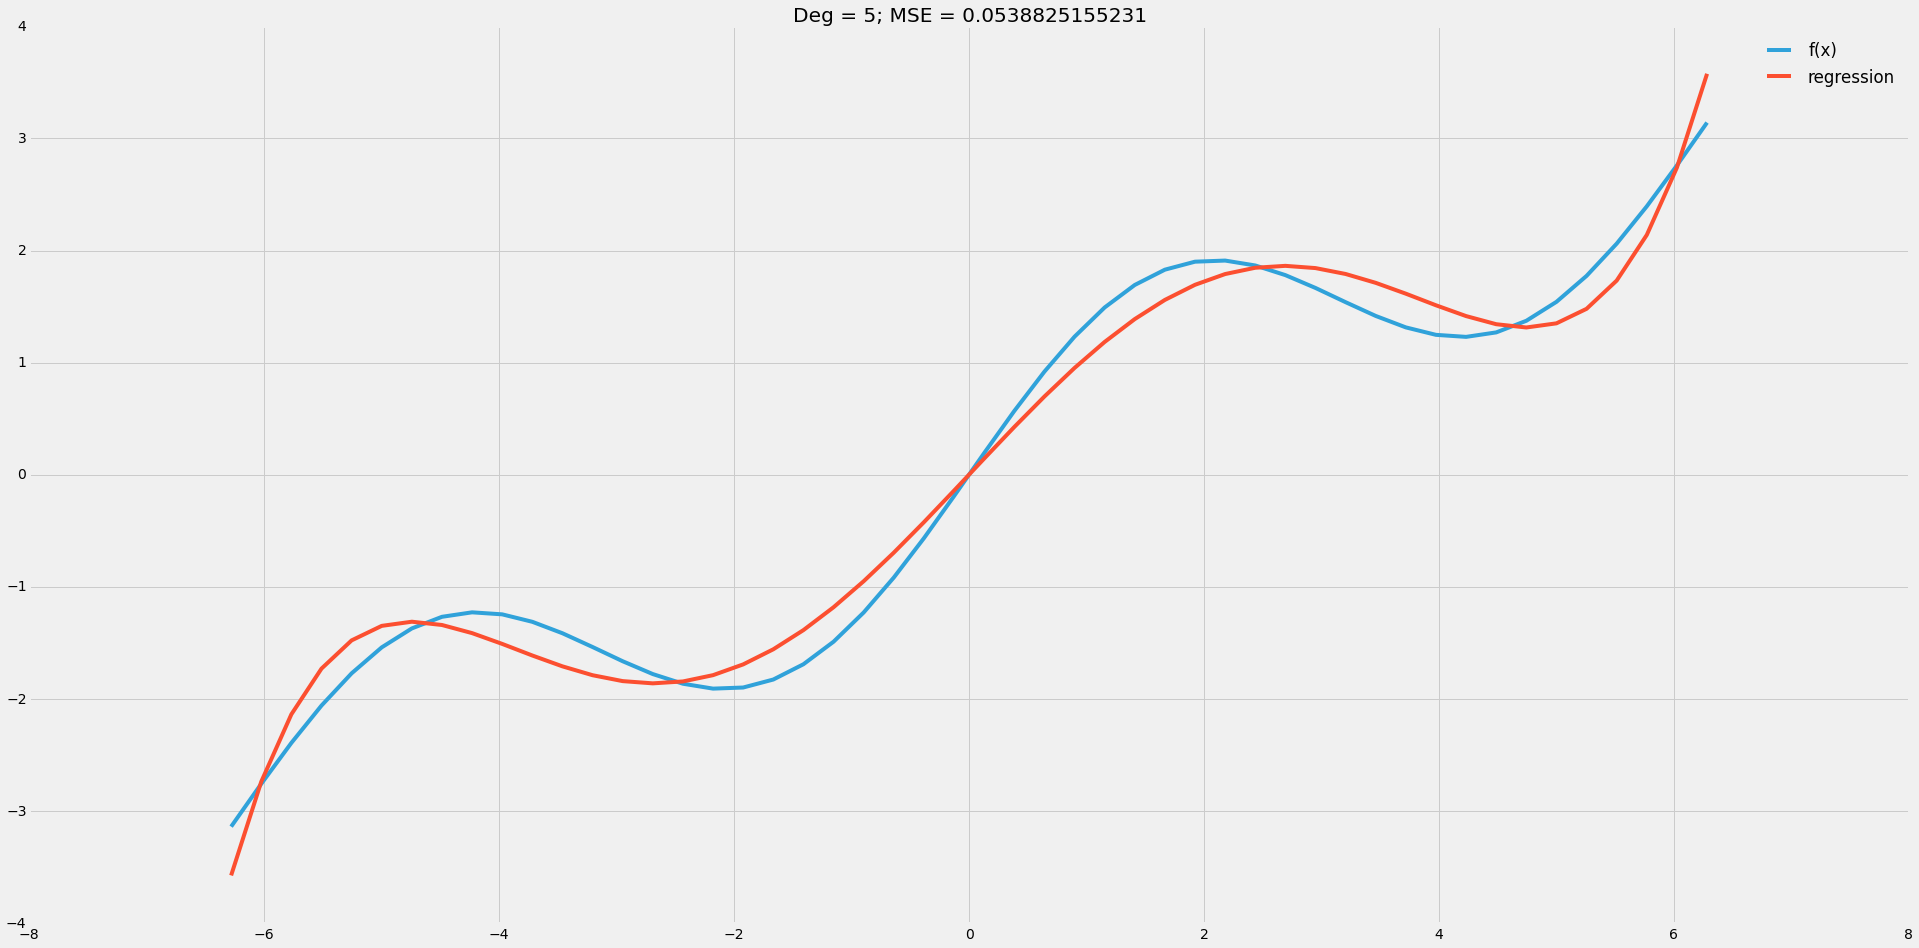

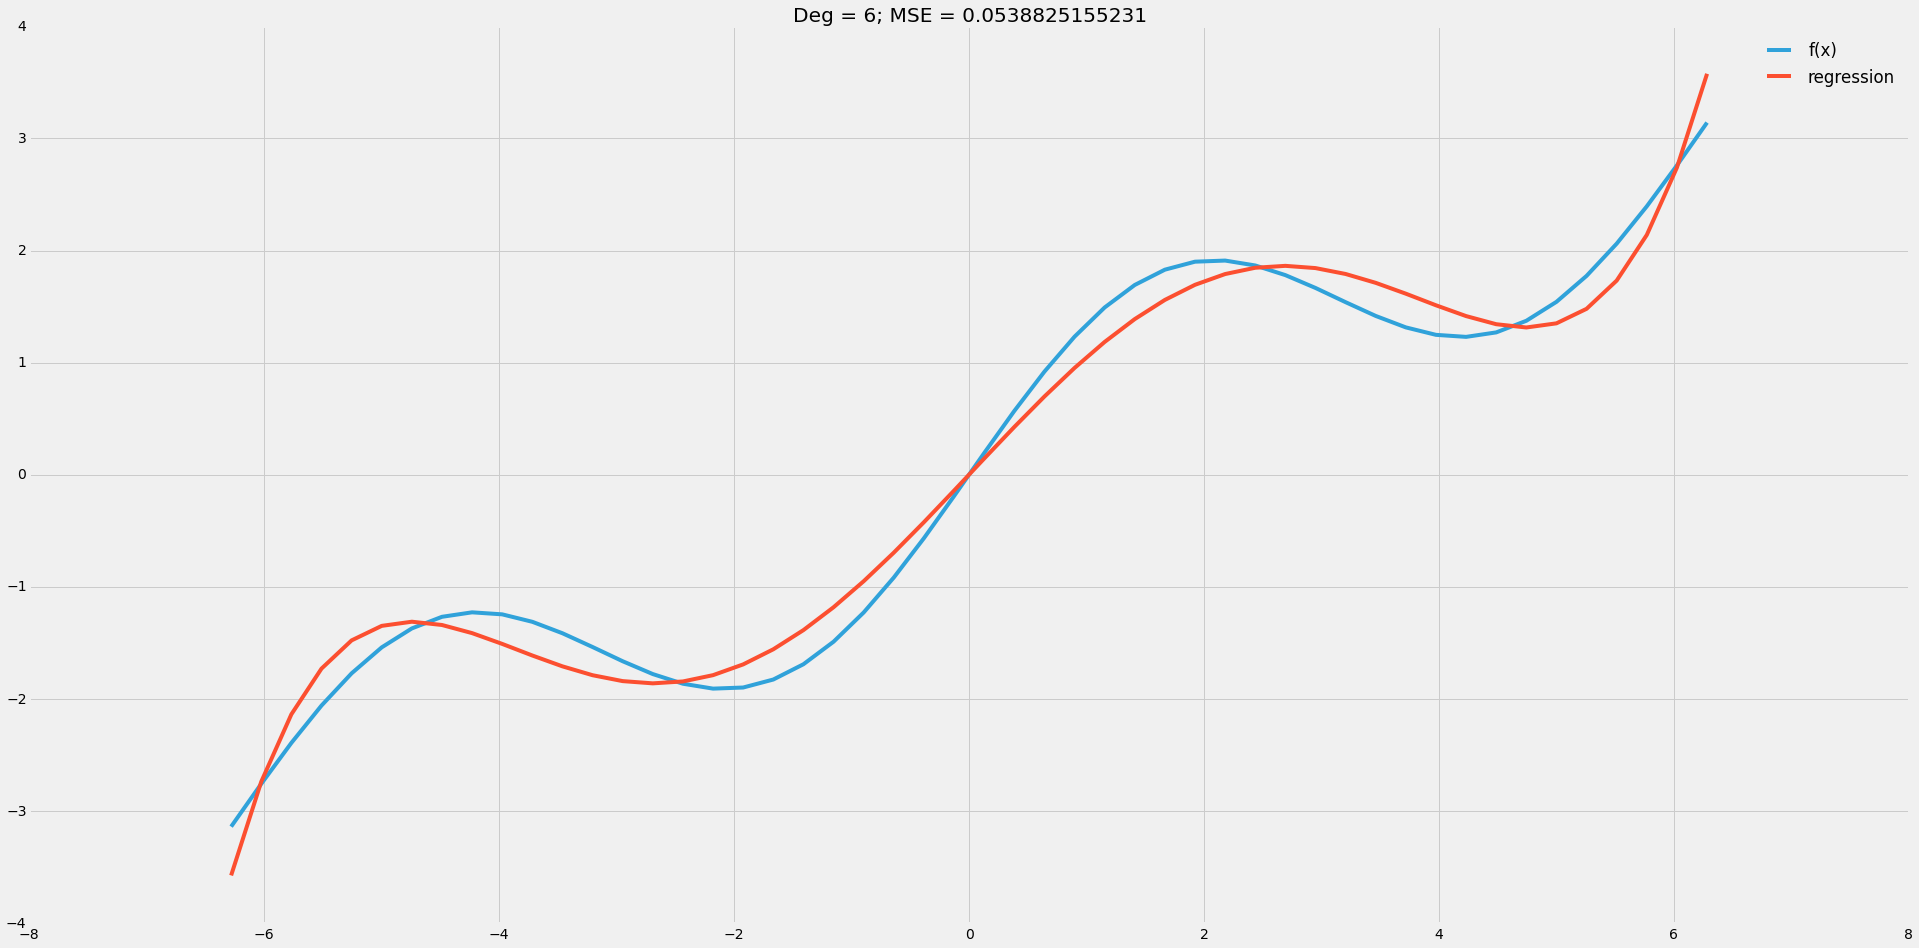

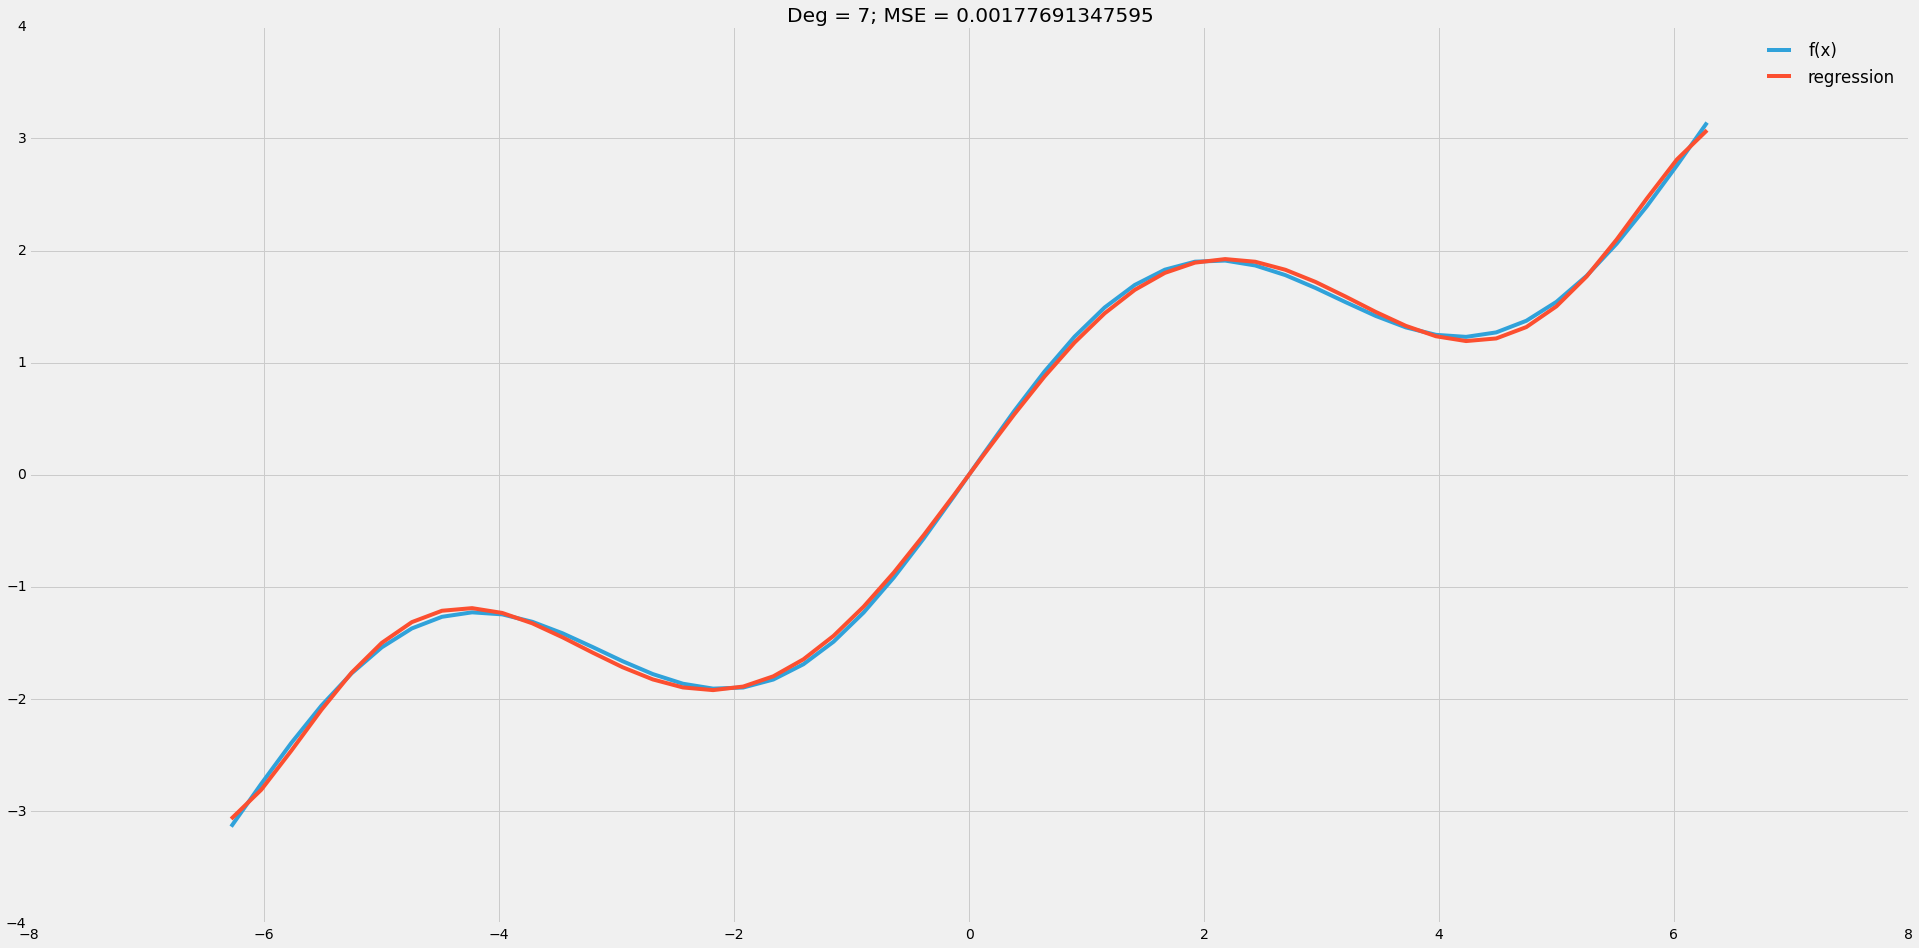

In [16]:
for i in [2,3,4,5,6,7]:
    regression_parameters = np.polyfit(x, f(x), deg=i)
    line = np.polyval(regression_parameters, x)
    plt.plot(x, f(x), label = 'f(x)')
    plt.plot(x, line, label = 'regression')
    #calculating MSE
    mse = np.sum((f(x)-line)**2/len(x))
    plt.title('Deg = '+str(i)+'; MSE = '+str(mse))
    plt.legend()
    plt.show()

### Individual basis functions
- better regression results can be achieved by choosing better basis functions
    - use what we know about the function
    
- here, we use a matrix approach

In [17]:
#for monomials up to order 3
matrix = np.zeros((3+1, len(x)))
matrix

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
     

In [18]:
matrix[3,:] = x**3
matrix[2,:] = x**2
matrix[1,:] = x**1
matrix[0,:] = x**0

In [19]:
matrix

array([[  1.00000000e+00,   1.00000000e+00,   1.00000000e+00,
          1.00000000e+00,   1.00000000e+00,   1.00000000e+00,
          1.00000000e+00,   1.00000000e+00,   1.00000000e+00,
          1.00000000e+00,   1.00000000e+00,   1.00000000e+00,
          1.00000000e+00,   1.00000000e+00,   1.00000000e+00,
          1.00000000e+00,   1.00000000e+00,   1.00000000e+00,
          1.00000000e+00,   1.00000000e+00,   1.00000000e+00,
          1.00000000e+00,   1.00000000e+00,   1.00000000e+00,
          1.00000000e+00,   1.00000000e+00,   1.00000000e+00,
          1.00000000e+00,   1.00000000e+00,   1.00000000e+00,
          1.00000000e+00,   1.00000000e+00,   1.00000000e+00,
          1.00000000e+00,   1.00000000e+00,   1.00000000e+00,
          1.00000000e+00,   1.00000000e+00,   1.00000000e+00,
          1.00000000e+00,   1.00000000e+00,   1.00000000e+00,
          1.00000000e+00,   1.00000000e+00,   1.00000000e+00,
          1.00000000e+00,   1.00000000e+00,   1.00000000e+00,
        

- numpy has a sublibrary called numpy.linalg that contains various matrix functions
    - we'll use lstsq to solve least-squares optimization problems

In [20]:
regression_parameters = np.linalg.lstsq(matrix.T, f(x))[0]

- apply the regression parameters to the matrix

In [21]:
line = np.dot(regression_parameters, matrix)

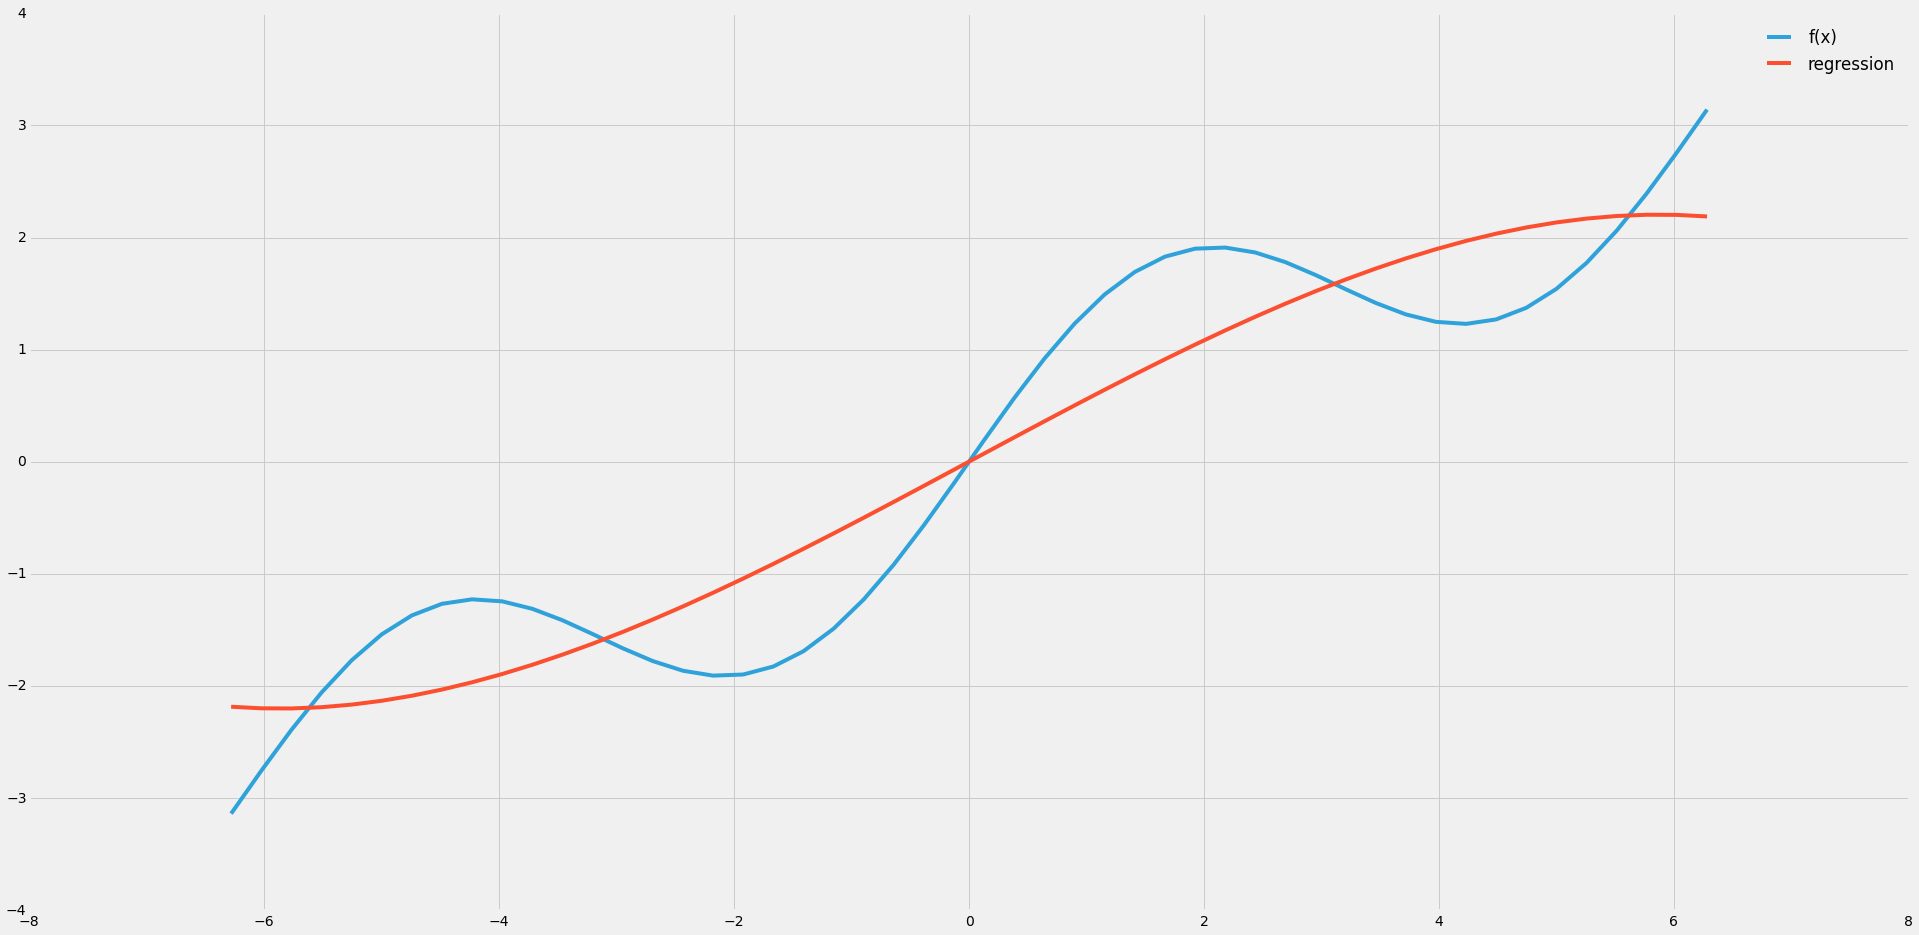

In [22]:
plt.plot(x, f(x), label = 'f(x)')
plt.plot(x, line, label = 'regression')
plt.legend()
plt.show()

- Not great, but we never included the sine function in our matrix

In [36]:
matrix[3,:]=np.sin(x)

regression_parameters = np.linalg.lstsq(matrix.T, f(x))[0]

line = np.dot(regression_parameters, matrix)

mse = np.sum((line-f(x))**2/len(x))

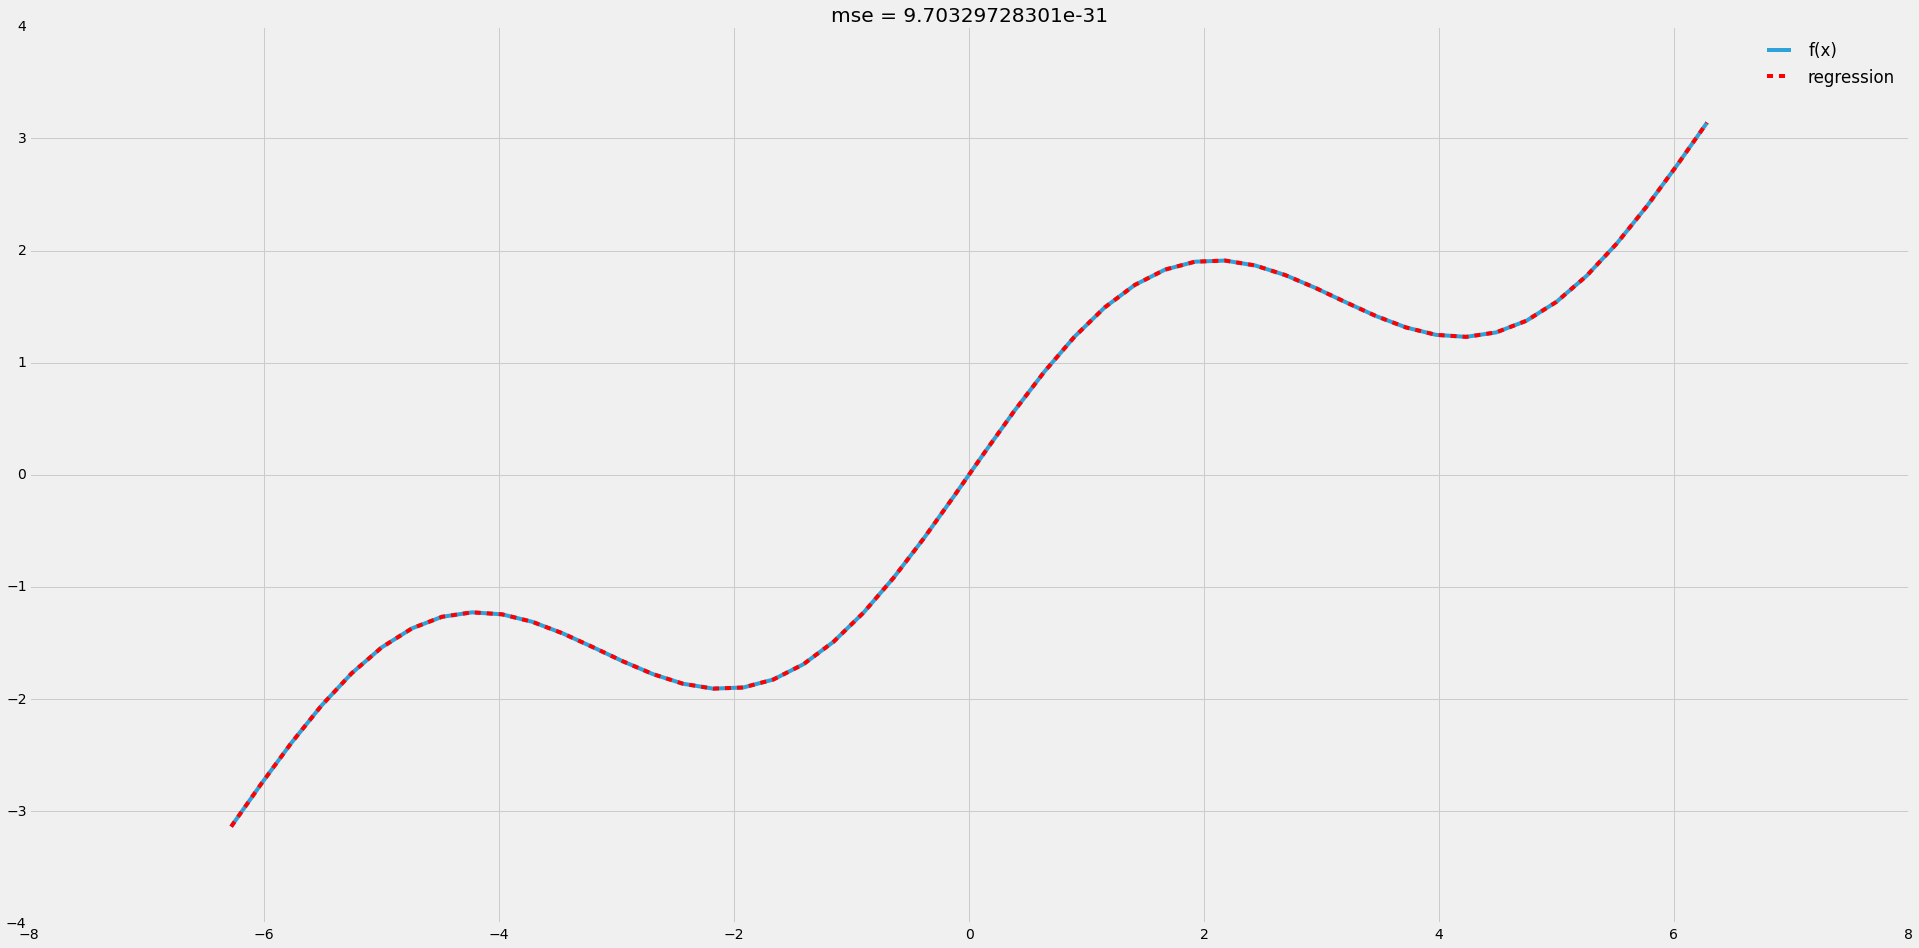

In [37]:
plt.plot(x, f(x), label = 'f(x)')
plt.plot(x, line, 'r--', label = 'regression')
plt.title('mse = '+str(mse))
plt.legend()
plt.show()

## Multiple Dimensions

In [49]:
fm = lambda (x,y): np.sin(x) + 0.25 * x + np.sqrt(y) + 0.05*y**2

In [52]:
x = np.linspace(0,10,20)
y = np.linspace(0,10,20)
X, Y = np.meshgrid(x,y)
Z = fm((X,Y))
x = X.flatten()
y = Y.flatten()

<matplotlib.colorbar.Colorbar instance at 0x0000000010518948>

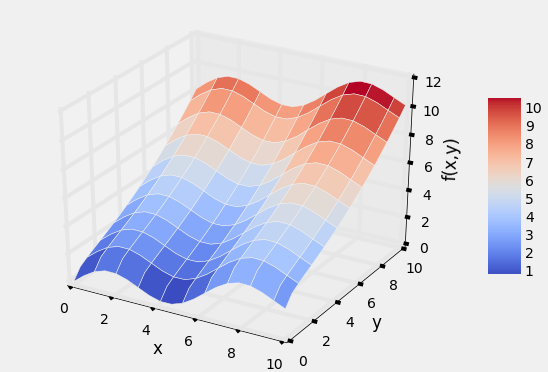

In [54]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl

fig = plt.figure(figsize=(9,6))
ax = fig.gca(projection='3d')
surface = ax.plot_surface(X, Y, Z, rstride=2, cstride=2, cmap=mpl.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')
fig.colorbar(surface, shrink=0.5, aspect=5)